# NBA Archetypes

## Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.manifold import TSNE

## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=';')
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=';')
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path = '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
server_path = '/datasets/'

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


In [3]:
display(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


## Data Preprocessing

In [4]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [5]:
# Define the mapping of current column names to full names
column_mapping = {
    'Rk': 'Rank',
    'Player': 'Player Name',
    'Pos': 'Position',
    'Age': 'Age',
    'Tm': 'Team',
    'G': 'Games Played',
    'GS': 'Games Started',
    'MP': 'Minutes Per Game',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FG%': 'Field Goal Percentage',
    '3P': 'Three-Point Field Goals Made',
    '3PA': 'Three-Point Field Goals Attempted',
    '3P%': 'Three-Point Field Goal Percentage',
    '2P': 'Two-Point Field Goals Made',
    '2PA': 'Two-Point Field Goals Attempted',
    '2P%': 'Two-Point Field Goal Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'FT%': 'Free Throw Percentage',
    'ORB': 'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB': 'Total Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal Fouls',
    'PTS': 'Points'
}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

# Verify the changes
print(df.head())


   Rank       Player Name Position  Age Team  Games Played  Games Started  \
0     1  Precious Achiuwa     PF-C   24  TOT            74             18   
1     1  Precious Achiuwa        C   24  TOR            25              0   
2     1  Precious Achiuwa       PF   24  NYK            49             18   
3     2       Bam Adebayo        C   26  MIA            71             71   
4     3      Ochai Agbaji       SG   23  TOT            78             28   

   Minutes Per Game  Field Goals Made  Field Goals Attempted  ...  \
0              21.9               3.2                    6.3  ...   
1              17.5               3.1                    6.8  ...   
2              24.2               3.2                    6.1  ...   
3              34.0               7.5                   14.3  ...   
4              21.0               2.3                    5.6  ...   

   Free Throw Percentage  Offensive Rebounds  Defensive Rebounds  \
0                  0.616                 2.6          

In [6]:
df_copy = df.copy
analyze(df)

,Rank,Player Name,Position,Age,Team,Games Played,Games Started,Minutes Per Game,Field Goals Made,Field Goals Attempted,...,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rank                               735 non-null    int64  
 1   Player Name                        735 non-null    object 
 2   Position                           735 non-null    object 
 3   Age                                735 non-null    int64  
 4   Team                               735 non-null    object 
 5   Games Played                       735 non-null    int64  
 6   Games Started                      735 non-null    int64  
 7   Minutes Per Game                   735 non-null    float64
 8   Field Goals Made                   735 non-null    float64
 9   Field Goals Attempted              735 non-null    float64
 10  Field Goal Percentage              735 non-null    float64
 11  Three-Point Field Goals Made       735 non

### Code

In [ ]:
# Drop columns not useful for clustering (e.g., Rank, Player Name, Team, Position)
df = df.drop(columns=['Rank', 'Player Name', 'Position', 'Team'])

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Inspect the first few rows to make sure it's scaled correctly
print(df.head())

   Age  Games Played  Games Started  Minutes Per Game  Field Goals Made  \
0   24            74             18              21.9               3.2   
1   24            25              0              17.5               3.1   
2   24            49             18              24.2               3.2   
3   26            71             71              34.0               7.5   
4   23            78             28              21.0               2.3   

   Field Goals Attempted  Field Goal Percentage  Three-Point Field Goals Made  \
0                    6.3                  0.501                           0.4   
1                    6.8                  0.459                           0.5   
2                    6.1                  0.525                           0.3   
3                   14.3                  0.521                           0.2   
4                    5.6                  0.411                           0.8   

   Three-Point Field Goals Attempted  Three-Point Field Goal P

### K Means Clustering to find archetypes

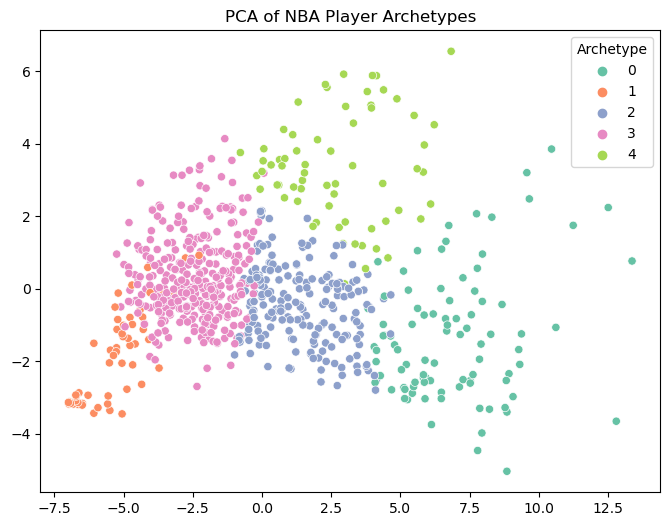

Silhouette Score: 0.22060833714582972


In [9]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Archetype'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters using PCA (dimensionality reduction)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Archetype'], palette='Set2')
plt.title('PCA of NBA Player Archetypes')
plt.show()

# Evaluate clustering using silhouette score
sil_score = silhouette_score(scaled_features, df['Archetype'])
print(f'Silhouette Score: {sil_score}')

In [10]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Reverse scaling the centroids to the original scale
centroids_df = scaler.inverse_transform(centroids)

# Create a DataFrame for easier interpretation
centroids_df = pd.DataFrame(centroids_df, columns=df.columns[:-1])
print(centroids_df)

         Age  Games Played  Games Started  Minutes Per Game  Field Goals Made  \
0  26.516484     62.021978      58.725275         33.282418          7.748352   
1  24.370370      6.000000       0.074074          5.598148          0.375926   
2  26.843434     58.025253      26.717172         24.511616          3.633838   
3  26.125382     28.125382       2.204893         11.276147          1.437920   
4  25.184615     52.200000      33.769231         23.892308          4.152308   

   Field Goals Attempted  Field Goal Percentage  Three-Point Field Goals Made  \
0              16.228571               0.477220                      2.064835   
1               1.670370               0.158963                      0.096296   
2               8.105556               0.449662                      1.488889   
3               3.288379               0.448624                      0.476758   
4               7.292308               0.578938                      0.375385   

   Three-Point Field Goals

### Random Forest Classifier

In [11]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Archetype'])
y = df['Archetype']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Feature importance (to see which features were most important for classification)
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
print(feature_importance.sort_values(by='Importance', ascending=False))


Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.93      0.81      0.87        16
           2       0.94      1.00      0.97        29
           3       0.94      0.95      0.95        66
           4       1.00      0.92      0.96        13

    accuracy                           0.95       147
   macro avg       0.96      0.94      0.95       147
weighted avg       0.95      0.95      0.95       147

                                   Importance
Minutes Per Game                     0.111415
Points                               0.101985
Field Goals Attempted                0.086163
Field Goals Made                     0.084282
Field Goal Percentage                0.069887
Two-Point Field Goals Made           0.047565
Two-Point Field Goals Attempted      0.042188
Total Rebounds                       0.040599
Games Started                        0.037823
Defensive Rebounds    

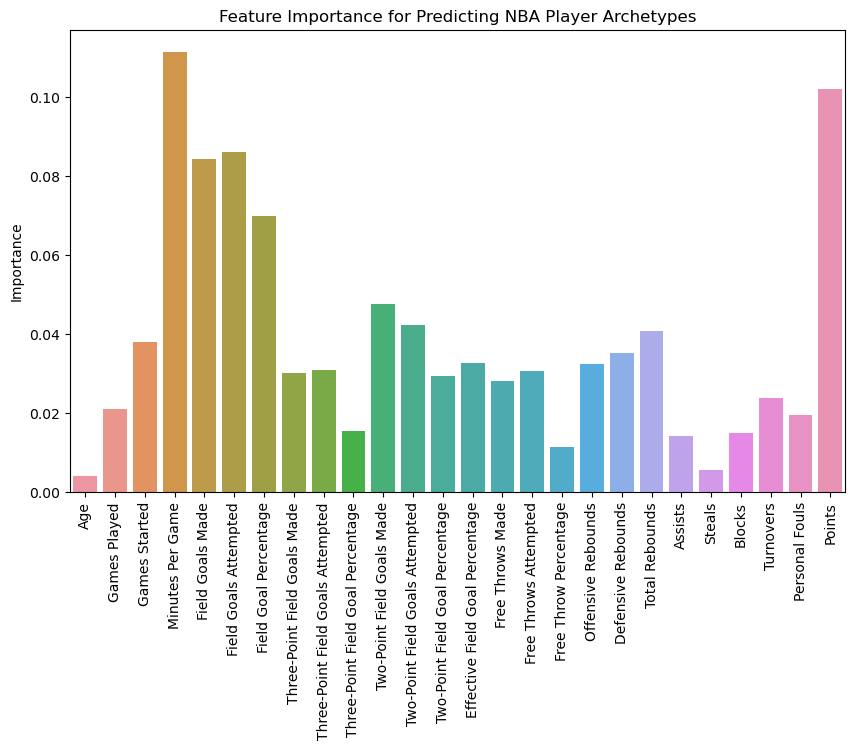

In [12]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance for Predicting NBA Player Archetypes')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


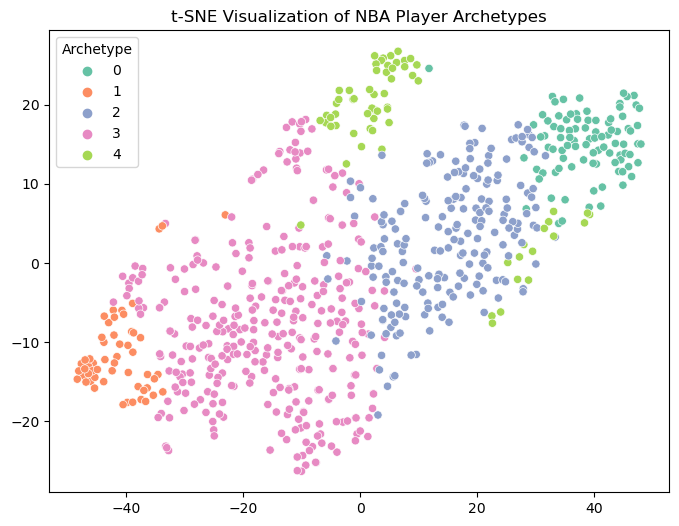

In [13]:
# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=df['Archetype'], palette='Set2')
plt.title('t-SNE Visualization of NBA Player Archetypes')
plt.show()
